In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

In [28]:
# Load in datasets and create cpoies of them

users = pd.read_csv("nft_users.csv", parse_dates=["first_action_iso_date"])
artworks = pd.read_csv("nft_items.csv", parse_dates=["mint_iso_date"])
df_user = users
df_art = artworks

## 0.0 An overview of datasets

### 0.1 How many piece of records in both datasets?

In [ ]:
print(str(len(artworks)) + " artworks and", str(len(users)), "users")

37420 artworks and 6726 users


### 0.2 What are the information documented in both datasets?

In [39]:
# Have a look at column names to get an overview of variables, and also check single piece of data from both datasets

print("Information about users:")
print(users.columns.tolist())
print("------")
print("Example of users data:")
print(users.iloc[18])
print("------")
print("Inforamtion about artworks:")
print(artworks.columns.tolist())
print("------")
print("Example of artworks data:")
print(artworks.iloc[0])

Information about users:
['address', 'first_action_iso_date', 'tzkt_info_name', 'mint_count', 'bought_count', 'bought_prices_avg', 'author_sold_count', 'author_sold_prices_avg', 'secondary_sold_count', 'secondary_sold_prices_avg', 'available_count', 'available_prices_avg', 'money_received', 'money_sent', 'ratio']
------
Example of users data:
address                      tz1Qw7r9P5NDVm7KwAKQGFXGPpqH5RgDPYQx
first_action_iso_date                   2021-03-01 14:33:27+00:00
tzkt_info_name                                                NaN
mint_count                                                    233
bought_count                                                   56
bought_prices_avg                                        13.94444
author_sold_count                                               2
author_sold_prices_avg                                    2.55000
secondary_sold_count                                            0
secondary_sold_prices_avg                                 0.0

### 0.3 Is there a need to rescale or format any variable?

----

Most of the data are documented in numeric variables, except categorial data like `artifact_mime`, and continious data like `fisrt_action_iso_date` and `mint_iso_date` in different type. We'll look at the actual questions to see if they need to be formatted.

In [38]:
users.dtypes

address                                   object
first_action_iso_date        datetime64[ns, UTC]
tzkt_info_name                            object
mint_count                                 int64
bought_count                               int64
bought_prices_avg                        float64
author_sold_count                          int64
author_sold_prices_avg                   float64
secondary_sold_count                       int64
secondary_sold_prices_avg                float64
available_count                            int64
available_prices_avg                     float64
money_received                           float64
money_sent                               float64
ratio                                    float64
dtype: object

In [42]:
artworks.dtypes

token_id                                   int64
issuer                                    object
mint_iso_date                datetime64[ns, UTC]
artifact_mime                             object
artifact_file_size                         int64
artifact_preview_width                     int64
artifact_preview_height                    int64
info_title                                object
info_description                          object
info_tags                                 object
ban_status                                object
author_sold_prices_avg                   float64
author_sold_count                          int64
secondary_sold_count                       int64
secondary_sold_prices_avg                float64
dtype: object

### 0.4 Missing data?

----

In user dataset:
 - 4811 pieces of `tzkt_info_name` data are missing. It's about users' other accounts on other platforms, which does not affect the integrity of dataset.
 - 4100 pieces of `ratio` data are missing. It can be assumed that some users may never receive or send any money on this platform.
 
In artworks dataset:
 - 12 artworks do not have `artifact_mime` record, suggesting unknown filetype of which.
 - A distinctive number of `info_title`, `infor_description`, `info_tags` are missed. It may not have significant negaive effect on analysis, but could be challenging to track back into certain artwork.
 - The huge number of missing `ban_status` may refer to the labelling method that only banned artworks will be marked as "banned".

In [54]:
print("Missing data in user dataset:")
print(users.isna().sum())
print("------")
print("Missing data in artworks dataset:")
print(artworks.isna().sum())

Missing data in user dataset:
address                         0
first_action_iso_date           0
tzkt_info_name               4811
mint_count                      0
bought_count                    0
bought_prices_avg               0
author_sold_count               0
author_sold_prices_avg          0
secondary_sold_count            0
secondary_sold_prices_avg       0
available_count                 0
available_prices_avg            0
money_received                  0
money_sent                      0
ratio                        4100
dtype: int64
------
Missing data in artworks dataset:
token_id                         0
issuer                           0
mint_iso_date                    0
artifact_mime                   12
artifact_file_size               0
artifact_preview_width           0
artifact_preview_height          0
info_title                     331
info_description              1567
info_tags                     3828
ban_status                   35523
author_sold_prices_av

### 0.5 Detailed description of all the data

----

Description of both user dataset and artworks dataset are presented togather in the table below. This can help understanding the overall distrbution of every variable, and also suggesting the plot methods(discussed in specific section).

In [56]:
users.describe().T.append(artworks.describe().T)

/Users/randgrant/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
mint_count,6726.00000,300.14020,1867.99847,0.00000,0.00000,10.00000,97.75000,78480.00000
bought_count,6726.00000,17.37169,82.52887,0.00000,0.00000,1.00000,8.00000,4199.00000
bought_prices_avg,6726.00000,4.96384,147.94554,0.00000,0.00000,0.20442,2.00000,11500.00000
author_sold_count,6726.00000,17.26777,72.32401,0.00000,0.00000,0.00000,4.00000,2348.00000
author_sold_prices_avg,6726.00000,5.60140,140.76978,0.00000,0.00000,0.00000,1.00000,10000.00000
secondary_sold_count,6726.00000,0.40946,3.49909,0.00000,0.00000,0.00000,0.00000,175.00000
secondary_sold_prices_avg,6726.00000,0.93909,20.97999,0.00000,0.00000,0.00000,0.00000,1337.00000
available_count,6726.00000,146.26702,1141.80086,0.00000,0.00000,4.00000,38.00000,52272.00000
available_prices_avg,6726.00000,5581.71141,181820.76521,0.00000,0.00000,1.01536,5.00000,10000000.00000
money_received,6726.00000,209.26210,8559.27311,0.00000,0.00000,0.00000,7.51434,685298.72912


## 1.0 Analysis on Users dataset

### 1.1 How's the growth of new users that participated their first NFT transaction?

related variables: `first_action_iso_date`



In [441]:
# Calculate the suitable bins
df_user["first_action_iso_date"].max() - df_user["first_action_iso_date"].min()

Timedelta('48 days 22:52:38')

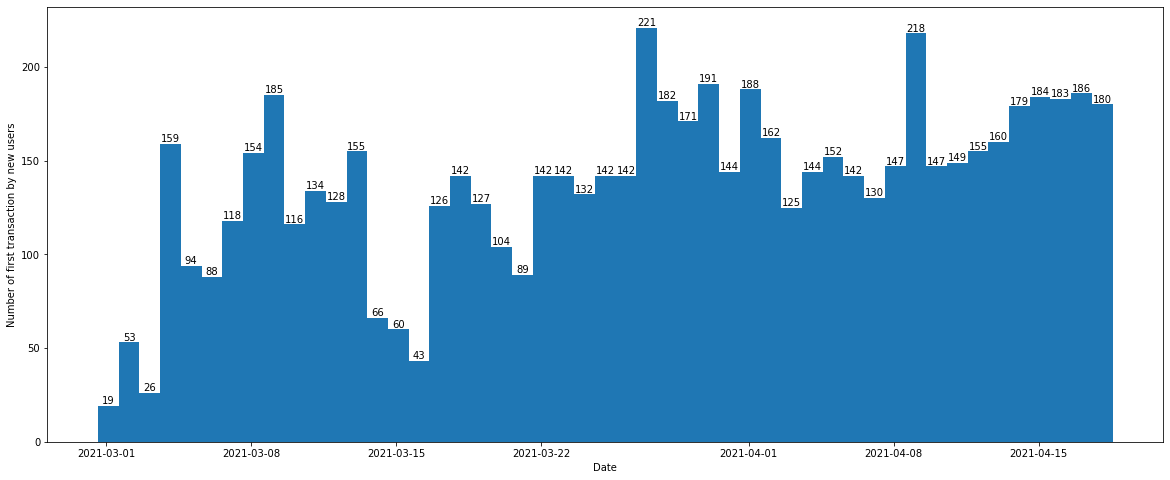

In [444]:
fig, ax = plt.subplots(figsize=(20,8)) 
number_of_bins = 49
ax.set_xlabel('Date')
ax.set_ylabel('Number of first transaction by new users')
counts, edges, bars = ax.hist(df_user["first_action_iso_date"], bins=number_of_bins)
h = plt.bar_label(bars)
#print(h)

### 1.2 User tend to mint/buy how many items on this platform, plus rankings.

related variables: `mint_count` `bought_count`

----

According to the description, both distribution of `mint_count` and `bought_count` are extreme， where most users own none and very few users own massive amount of artworks. In this case, I transferred these two **discrete variables** into **categorial variables** divided by the amount of artworks.

In [262]:
users.describe().T.iloc[:2]

/Users/randgrant/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
mint_count,6726.00000,300.14020,1867.99847,0.00000,0.00000,10.00000,97.75000,78480.00000
bought_count,6726.00000,17.37169,82.52887,0.00000,0.00000,1.00000,8.00000,4199.00000


#### 1.2.1 Mint Count Pie Chart

In [554]:
# Creating new features, turn mint_count number into categorial number representing which interval the mint_count value belongs to. 
mint_rank_alt = mint_rank
mint_rank_alt["group"] = None

for index, every_user in mint_rank_alt.iterrows():
    mint_number = every_user["mint_count"]
    if mint_number <= 10:
        mint_rank_alt.iloc[index] = {"group": 1 }
    elif mint_number > 10 and mint_number <= 100:
        mint_rank_alt.iloc[index] = {"group": 2 }
    elif mint_number > 100 and mint_number <= 1000:
        mint_rank_alt.iloc[index] = {"group": 3 }
    elif mint_number > 1000 and mint_number <= 10000:
        mint_rank_alt.iloc[index] = {"group": 4 }
    else:
        mint_rank_alt.iloc[index] = {"group": 5 }

mint_rank_alt["group"] = [int(i) for i in mint_rank_alt["group"]]

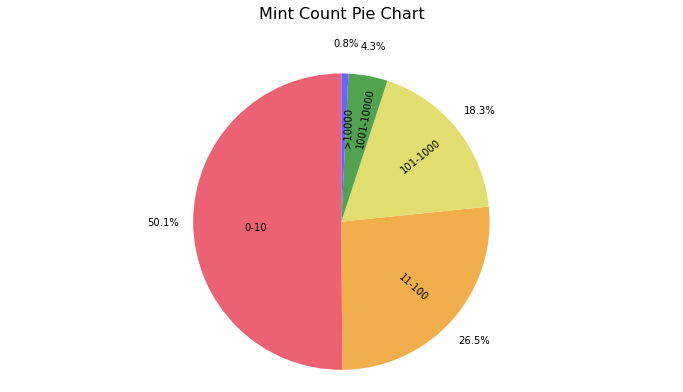

In [496]:
# Code adpted from https://www.kaggle.com/code/sametardaerdogan/students-performance-eda-and-visualization/notebook
plt.figure(figsize=(12, 6))
labels=["0-10","11-100","101-1000","1001-10000",">10000"]
plt.pie(mint_rank_alt["group"].value_counts().values,
        labels=labels,
        labeldistance = 0.5,
        pctdistance = 1.2,
        rotatelabels = True,
        textprops={'fontsize': 10},
        startangle=90,
        autopct='%1.1f%%',
        colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"])
plt.title('Mint Count Pie Chart',fontsize=16,pad=40)
plt.axis('equal')
plt.show()

#### 1.2.2 Bought Count Pie Chart

In [555]:
bought_rank_alt = bought_rank
bought_rank_alt["group"] = None

for index, every_user in bought_rank_alt.iterrows():
    count_number = every_user["bought_count"]
    if count_number <= 0:
        bought_rank_alt.iloc[index] = {"group": 1 }
    elif count_number > 0 and count_number <= 5:
        bought_rank_alt.iloc[index] = {"group": 2 }
    elif count_number > 5 and count_number <= 10:
        bought_rank_alt.iloc[index] = {"group": 3 }
    elif count_number > 10 and count_number <= 100:
        bought_rank_alt.iloc[index] = {"group": 4 }
    elif count_number > 100 and count_number <= 1000:
        bought_rank_alt.iloc[index] = {"group": 5 }
    else:
        bought_rank_alt.iloc[index] = {"group": 6 }

bought_rank_alt["group"] = [int(i) for i in bought_rank_alt["group"]]

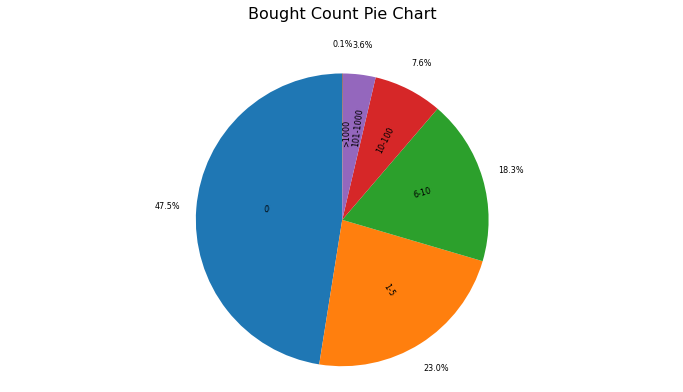

In [551]:
# Code adpted from https://www.kaggle.com/code/sametardaerdogan/students-performance-eda-and-visualization/notebook
plt.figure(figsize=(12, 6))
labels=["0","1-5","6-10","10-100","101-1000",">1000"]
plt.pie(bought_rank_alt["group"].value_counts().values,
        labels=labels, 
        labeldistance=0.5,
        pctdistance = 1.2,
        textprops={'fontsize': 8},
        rotatelabels = True,
        startangle=90, 
        autopct='%1.1f%%',
        )
plt.title('Bought Count Pie Chart',fontsize=16,pad=40)
plt.axis('equal')
plt.show()

#### 1.2.3 Rankings: Top mint/buy users

In [279]:
# sort up top X values
top_number = 15
mint_rank = df_user.sort_values(by = "mint_count", ascending = False)[["mint_count","tzkt_info_name","address"]]
bought_rank = df_user.sort_values(by = "bought_count", ascending = False)[["bought_count","tzkt_info_name","address"]]

# Concatenate these two ranking into one data frame
mint_rank_reset = mint_rank[:top_number].reset_index().drop(["index"],axis =1)
bought_rank_reset = bought_rank[:top_number].reset_index().drop(["index"],axis =1)
items_rank = pd.concat([mint_rank_reset, bought_rank_reset], axis=1)
items_rank

,mint_count,tzkt_info_name,address,bought_count,tzkt_info_name,address
0,78480,Nick Fox-Gieg,tz1Tk4FSuhQZ8aqNaGs49NZkuKV3MSYCnDPM,4199,OWSLEYBEATS,tz1YNUNArBDYWu8evZj73HR9vE6y5FQkaj5M
1,38797,mimeArtist,tz1ZsNvZKUveN7FjRhMHTm9NiAUNAmrwdFKV,1662,NaN,tz1Pu8zRmNghAHzWxsT9Cy2qXHxkCrHcB3vc
2,32352,Sebuh Honarchian,tz1NufWtpqS3nfR8VW1xFyWq4GWqb969keeR,1407,tiegenhof,tz1bxe2Tp3EqWZqZX5Kvmg9MxTmX8LBiUchk
3,31970,Mr.doob,tz1UAY5RSuG6nRJhdHDVMVSg9Lt2pSZez5JR,1290,NaN,tz1QDunNSnWrqwCc78TqzHP86BMNXq1P7Jxb
4,30335,NaN,tz1MgDFQvyV8Vfc48HgeqMbCD2Po7nhoWDeL,1130,NaN,tz1UAYfFWmaTrQTYMptaGCw6LrXK5Yv84VnQ
5,30000,NaN,tz1cVHE1Rp9DBFkAkhWy8XBfvPefh9C2psFc,1040,NaN,tz1MCaehYRvrhPWv7HiCYQKyi9WDXbAUZkwv
6,24728,Will Geary,tz2Dmeg3NFMuKNBuw2XWufro5tnxuf37ukxB,965,Cody Bales,tz1L7oVDv58oKd6dDrRAgXMhgZbJREvmrMg9
7,24186,NaN,tz1XuKatiqM9nY94nUZDY6fhkVkK9nRMRMmj,857,NaN,tz1QzteR6agXmyGwrGvvXAqZmoRr75ANLHJ4
8,21540,Bjorn Calleja,tz2Hz4TVJZjoQVks4SfWgt38RfZTmrHmVH62,855,Cryptopolitan,tz1Rg3n8aWJfqKKb67RCgQdY7ZwpQJdJ6NPd
9,21012,NaN,tz1fXvCs7BqoMTZFtGAusDwHsqeJyVGQF9j7,837,NaN,tz1WAdmMAgUscdpwdfxcyhveB5BnE7wtrz3q


### 1.3 User spent and earned how much money on this platform?

related variables: `money_sent` `money_received`

----

According to the description, distribution of `money_sent` and `money_received` data are also extreme，

In [553]:
users.describe().T.iloc[-5:-3]

/Users/randgrant/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
money_received,6726.00000,209.26210,8559.27311,0.00000,0.00000,0.00000,7.51434,685298.72912
money_sent,6726.00000,209.26210,8991.22562,0.00000,0.00000,0.90000,11.45000,679104.27599


#### 1.3.1 Rankings: Top spent/earned user

In [283]:
# sort up top X values
top_number = 15
sent_rank = df_user.sort_values(by = "money_sent", ascending = False)[["money_sent","tzkt_info_name","address"]]
received_rank = df_user.sort_values(by = "money_received", ascending = False)[["money_received","tzkt_info_name","address"]]

# Concatenate these two ranking into one data frame
sent_rank_reset = sent_rank[:top_number].reset_index().drop(["index"],axis =1)
received_rank_reset = received_rank[:top_number].reset_index().drop(["index"],axis =1)
money_rank = pd.concat([sent_rank_reset, received_rank_reset], axis=1)
money_rank

,money_sent,tzkt_info_name,address,money_received,tzkt_info_name,address
0,679104.27599,Hic et nunc Minter,KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9,685298.72912,Hic et nunc Minter,KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9
1,284300.00000,NaN,tz1TWji319FdKeXF6vwvZVXfrzB7JUwsgoAi,113465.62500,NaN,tz1RmuzUDF82LcS4a1NDq3vVdycTzF2Evpgi
2,20342.76246,NaN,tz1bhMc5uPJynkrHpw7pAiBt6YMhQktn7owF,68932.50000,NaN,tz1eRdK9wr4PZDkFMQoW2DzyxN8ZV4irmiGJ
3,19395.17490,NaN,tz1eee5rapGDbq2bcZYTQwNbrkB4jVSQSSHx,44362.50000,NaN,tz1XPcu86MbxHs8Djg1PG65TD4RE23a2E7vY
4,15698.79063,QuipuSwap hDAO,KT1V41fGzkdTJki4d11T1Rp9yPkCmDhB7jph,23887.50000,NaN,tz1cVH1jz2qjLNGaqvtm3wnYMLpPy9xQE2L6
5,11500.00000,NaN,tz1Uby674S4xEw8w7iuM3GEkWZ3fHeHjT696,21536.33629,QuipuSwap hDAO,KT1V41fGzkdTJki4d11T1Rp9yPkCmDhB7jph
6,11365.00000,NaN,tz1hn6j226SC91kqGyYaoii3cAxY6MUwsDub,19500.00000,NaN,tz2UuUoPpH51i6PTt9Bc7iBZ4ibhHUsczcwY
7,7252.42104,Cryptopolitan,tz1Rg3n8aWJfqKKb67RCgQdY7ZwpQJdJ6NPd,18384.43001,John Karel,tz1gqaKjfQBhUMCE6LhbkpuittRiWv5Z6w38
8,6602.55511,Cody Bales,tz1L7oVDv58oKd6dDrRAgXMhgZbJREvmrMg9,18235.42500,NaN,tz1bpz9S6JyBzMvJ97qPL7TeejkUiLjdkDAm
9,6479.34023,NaN,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw,16979.24187,NaN,tz1UBZUkXpKGhYsP5KtzDNqLLchwF4uHrGjw


#### 1.3.2 How big is the market on hicetnunc.xyz?

related variables: `money_sent` `money_received`

----

The market volume is more than 700,000 (US dollar?).

*"Hic et nunc Minter" user is taken out according to the ranking table.

In [393]:
print(sent_rank.iloc[1:]["money_sent"].sum())
print(received_rank.iloc[1:]["money_received"].sum())

728392.5860299998
722198.132896999


#### 1.3.3 Distribution of users spend and earn money

related variables: `money_sent` `money_received`

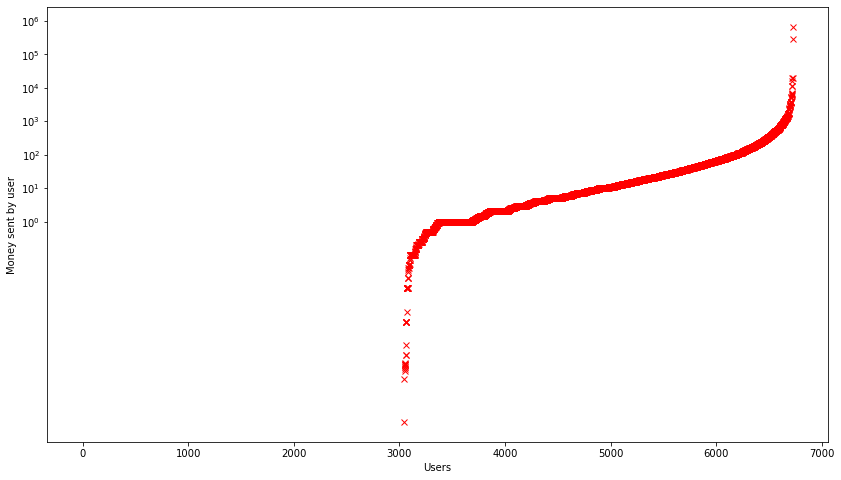

In [500]:
sent_plot = sent_rank.sort_values(by="money_sent",ascending = True)["money_sent"]
sent_plot = sent_plot.tolist()

fig, ax = plt.subplots(figsize=(14,8))
ax.set_yscale('log')
max_value = sent_rank["money_sent"].max()
yticks = np.logspace(0,int(np.log10(max_value))+1, 7).tolist()
ax.set_yticks(yticks)
ax.set_ylabel("Money sent by user")
ax.set_xlabel("Users")
ax.plot(sent_plot,"rx")

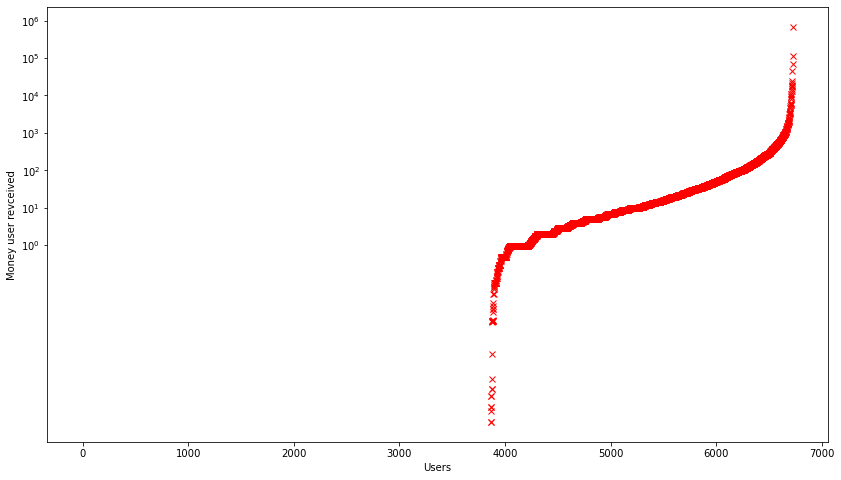

In [501]:
received_plot = received_rank.sort_values(by="money_received",ascending = True)["money_received"]
received_plot = received_plot.tolist()

fig, ax = plt.subplots(figsize=(14,8))
ax.set_yscale('log')
max_value = received_rank["money_received"].max()
yticks = np.logspace(0,int(np.log10(max_value))+1, 7).tolist()
ax.set_yticks(yticks)
ax.set_ylabel("Money user revceived")
ax.set_xlabel("Users")

ax.plot(received_plot,"rx")

### 1.4 Correlation between variables

----

Accroding to the correlation heatmap, three pairs of variables have high Pearson's r coeffient(>0.5).

* `available_count` X `mint_count`
    * It's reasonable to have these two variable in high correlation, as part of available artworks are *"minted"* artworks to be sold. But we can still take advantage of this correlation to predict the percentage of artworks one owned will eventually be sold. 

* `author_sold_count` X `secondary_sold_count`
    * User who had good perfomance of selling self-made artworks tend to have the ability to estimate good investments in other artworks.    

* `money_received` X `money_sent`
    * The number of earnings are highly related to the number of investment money. User tend to have a equivelant ability of selling and investing NFT artworks.
    

Summary:

* We can predict how many artworks will eventually be sold.
* People in NFT artworks market tend to have a equivelant ability of selling and investing NFT artworks.

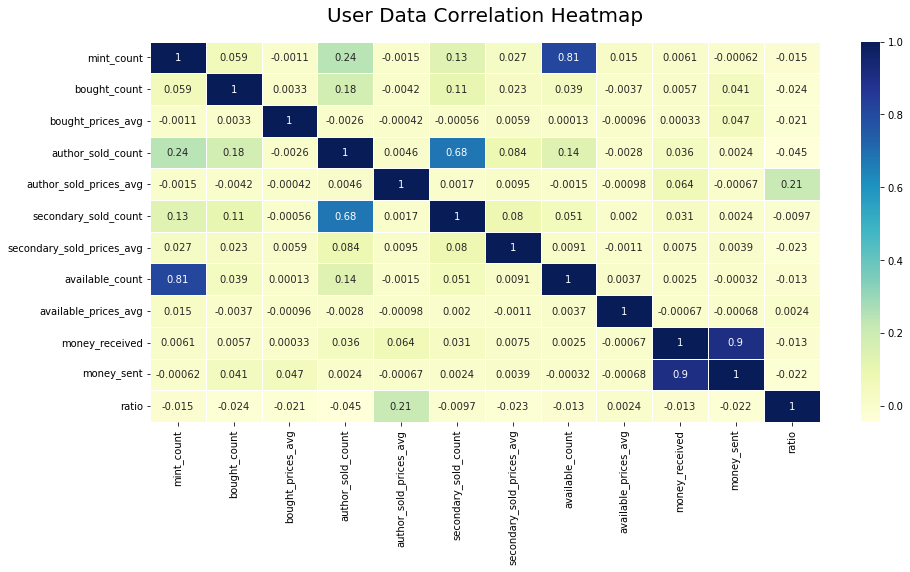

In [403]:
# Code adapted from https://www.kaggle.com/code/sametardaerdogan/students-performance-eda-and-visualization/notebook
import seaborn as sns
plt.figure(figsize=(15,7))
plt.title('User Data Correlation Heatmap',color='Black',fontsize=20,pad=20)
sns.heatmap(df_user.corr(),annot=True,linewidths=.5, cmap = "YlGnBu");

### 1.5 Prediction: People tend to successfully sell near 50% of their artworks mintted and bought on NFT artworks market.

related variables: `mint_count` `bought_count` `available count` 

----

Technically, it can be regarded that `mint_count + bought_count = available_count + author_sold_count + secondary_sold_count`. Therefore I checked two ways of correlation.

**Case 1**

Independent variables: `mint_count` `bought_count`
Dependent variable: `available_count`

**Case 2**

Independent variable: `total_artworks_count(mint_count+bought_count)`
Dependent variable: `available_count`

#### 1.5.1 Case 1
----
In case 1, the r2 number is near 0.66, which indicates a strong correlation.

In [544]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
x = df_user[['mint_count','bought_count']]
y = df_user['available_count'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y)) 
print(r2_score(y,regr.predict(x)))

[ 0.49662589 -0.12566798] -0.6073050704268894 0.6593371558229457
0.6593371558229457


#### 1.5.2 Case 2
----
In case 2, the r2 number is even higher than the one in case 1, which is around 0.81.

In [546]:
df_user["total_artworks_count"] = df_user["mint_count"] + df_user["bought_count"]
x = df_user["total_artworks_count"] 
y = df_user['available_count'] 
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept ,r, p)

0.49379675973245873 -10.519321012971005 0.8107623640212174 0.0


**Case 2 plotted in log scale**

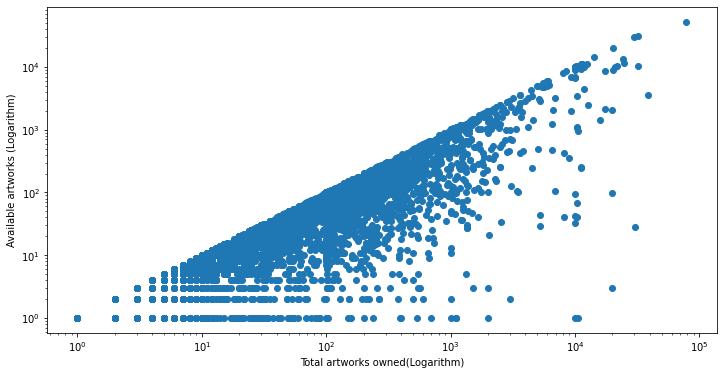

In [549]:
# Code adapted from intro-to-ds-week-4.ipynb
data = df_user[["total_artworks_count","available_count"]].values
x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Total artworks owned(Logarithm)","Available artworks (Logarithm)")
ax.set_yscale('log')
ax.set_xscale('log')

**Case 2 plotted with linear regression model**

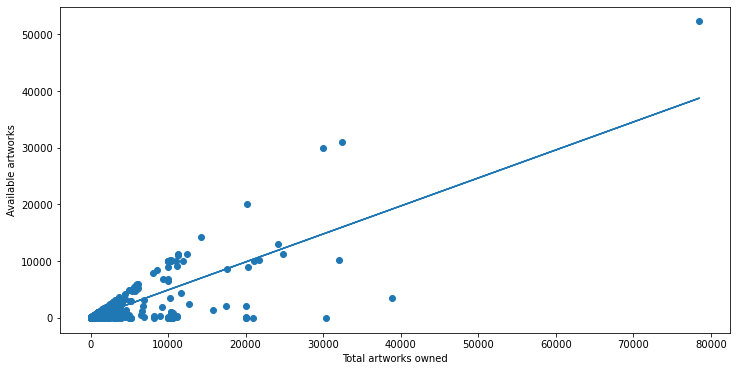

In [550]:
data = df_user[["total_artworks_count","available_count"]].values
x = data[:,0]
y = data[:,1]
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Total artworks owned","Available artworks")
ax.plot(x, model_y)

We may assume the second case to be more suitable for prediction as the r2 value is higher.

Interpretation of model:

`Available Artworks = 0.493 * (Mintted Artworks + Bought Artworks) - 10.519 + Error`